# Q-learning

Obviously, this name comes form the $Q$ function. This method is very similar to SARSA, the only difference is that, instead of using $R_t + \gamma*Q(s_{t+1}, a_{t+1})$ as the bootstrap estimate it uses $R_t + \gamma*max_{a \in A}Q(s_{t+1}, a)$. This means the update doesn't really care about what the agent is doing(its policy) but just about what it believes would be the best thing to do(its $Q$ function), for this reason, this is called an "off-policy" method. The learning rule is:



$$ Q_(s, a) \leftarrow Q(s_{t}, a_{t}) + \alpha(R_t + \gamma*max_{a \in A}Q(s_{t+1}, a) - Q(s_{t}, a_{t}))$$



Again after updating the $Q$ function, we will update our policy, take a new action based on this policy and repeat the process. Notice that although the policy doesn't matter for the $Q$ updates, it still dictates what actions the agent will take, which affects learning since he can only improve over actions he actually takes.



This is also very simple to implement so I won't go through the details in the notebook; you can directly check how the class is implemented on the code base, it should be pretty easy to understand.

In [1]:
import sys

sys.path.append("../..")

import numpy as np
import matplotlib.pyplot as plt

from grid_world.action import Action
from grid_world.grid_world import GridWorld
from grid_world.agents.q_agent import QAgent
from grid_world.visualization.format_objects import (
    get_policy_rec_str,
    get_policy_eval_str,
    get_world_str,
)
from grid_world.utils.returns import returns_from_reward
from grid_world.utils.policy import get_policy_rec, get_random_policy, sample_action

np.random.seed(21)

# World

We will use the same world

In [2]:
gworld = GridWorld(
    grid_shape=(4, 5),
    terminal_states_coordinates=((0, 4),),
    walls_coordinates=((0, 1), (1, 1), (2, 3)),
    traps_coordinates=((1, 3),),
)
print(get_world_str(gworld))

3               

2          █    

1    █     ☠    

0 ⚐  █        ✘ 

  0  1  2  3  4 


# Agent

Just need to instantiate our agent

In [3]:
def reward(e):
    if e == 1:
        return 0
    elif e == -1:
        return -10
    else:
        return -1


agent = QAgent(
    world=gworld,
    reward_function=reward,
    actions=[Action.up, Action.down, Action.left, Action.right],
    gamma=1,
    alpha=0.1,
    epsilon=0.1,
)

# Train

Training is just like in SARSA. The agent will make a bunch of runs through the world, learning from each step it takes.

In [4]:
episode_lengths, episode_returns = agent.train(episodes=200)

In [5]:
pi_r = get_policy_rec(agent.policy, gworld, agent.actions)
print(get_policy_rec_str(pi_r, gworld))

 →  ↑  →  →  ↓ 

 →  →  ↓  █  ↓ 

 ↑  █  ↓  ☠  ↓ 

 ↑  █  →  →  ✘ 




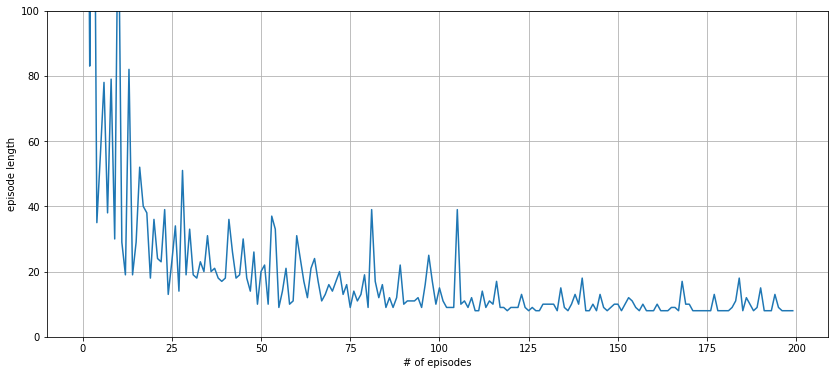

In [6]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(episode_lengths)

ax.set(xlabel="# of episodes", ylabel="episode length", ylim=[0, 100])
ax.grid()

plt.show()

This agent also gets really good, and learnes the optimal path. We will make some more in depth comparison between agents in other notebooks.